# DSCI 503 - Homework 05
### Jeffery Boczkaja

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Working with Arrays

In [2]:
np.random.seed(1)
Z = np.random.uniform(low = 0, high = 10, size=(5,8))
Z = np.round(Z,decimals=2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
print("Row 3:    ", Z[3])
print("Column 6: ",Z[:,6])

Row 3:     [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
Column 6:  [1.86 0.27 3.13 0.98 0.18]


In [4]:
print("Row Sums:    ",np.sum(Z,axis=1))
print("Column Sums: ",np.sum(Z,axis=0))
print("Array Sums:  ",np.sum(Z))

Row Sums:     [22.1  38.19 40.88 34.62 47.89]
Column Sums:  [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sums:   183.68


## Problem 2: Reshaping and Stacking Arrays

In [5]:
np.random.seed(167)

x1 = np.random.normal(50, 10, 1000)
x2 = np.random.normal(20, 5, 1000)
x3 = np.random.normal(100, 30, 1000)
x4 = np.random.normal(10, 2, 1000)

x1 = x1.reshape(x1.shape[0],-1)
x2 = x2.reshape(x2.shape[0],-1)
x3 = x3.reshape(x3.shape[0],-1)
x4 = x4.reshape(x4.shape[0],-1)

X = np.hstack((x1,x2,x3,x4))

X = np.round(X, 2) 

print(X.shape)

(1000, 4)


In [6]:
print(X[:6,:])

[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


## Problem 3: Standardization

In [7]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
print("Column means:              ", np.round(mean, 2))
print("Column standard deviations:", np.round(std, 2))

Column means:               [50.21 19.86 99.84 10.06]
Column standard deviations: [ 9.69  5.08 30.88  2.03]


In [8]:
W = (X-mean)/std
meanW = np.mean(W,axis = 0)
stdW  = np.std(W,axis = 0)
#Results only show for Column means when given 14 decimal places to work and nothing good unless you give a few more.
print("Column means:              ", np.round(meanW,2))
print("Column standard variation: ", np.round(stdW,2))

Column means:               [ 0. -0. -0. -0.]
Column standard variation:  [1. 1. 1. 1.]


## Problem 4: Load Auto MPG Dataset

In [9]:
auto = pd.read_csv('auto_mpg.txt', sep='\t')
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
auto.shape

(398, 5)

In [11]:
means = auto.mean()
print(means)

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64


C:\Users\whitl\AppData\Local\Temp\ipykernel_12844\3665996849.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = auto.mean()


## Problem 5: Regional Counts and Means

In [12]:
regions = np.unique(auto['region'])
print(regions)

['asia' 'eur' 'usa']


In [13]:
Asia=auto.region=='asia'
Europe=auto.region=='eur'
USA=auto.region=='usa'
asia_auto=auto[Asia]
eur_auto=auto[Europe]
usa_auto=auto[USA]
print("Number of cars manufactured in Asia:  ",len(asia_auto))
print("Number of cars manufactured in Europe:",len(eur_auto))
print("Number of cars manufactured in USA:   ",len(usa_auto))

Number of cars manufactured in Asia:   79
Number of cars manufactured in Europe: 70
Number of cars manufactured in USA:    249


In [14]:
asia_means=asia_auto.mean()
eur_means=eur_auto.mean()
usa_means=usa_auto.mean()

mean_df=pd.DataFrame({'region':['asia','eur','usa'],'mpg':[asia_means['mpg'],eur_means['mpg'],usa_means['mpg']],
         'cyl':[asia_means['cyl'],eur_means['cyl'],usa_means['cyl']],
         'wt':[asia_means['wt'],eur_means['wt'],usa_means['wt']]})
mean_df.set_index(['region'],inplace=True)

mean_df

C:\Users\whitl\AppData\Local\Temp\ipykernel_12844\1966950715.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  asia_means=asia_auto.mean()
C:\Users\whitl\AppData\Local\Temp\ipykernel_12844\1966950715.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  eur_means=eur_auto.mean()
C:\Users\whitl\AppData\Local\Temp\ipykernel_12844\1966950715.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. S

,mpg,cyl,wt
region,,,
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

<Figure size 800x400 with 0 Axes>

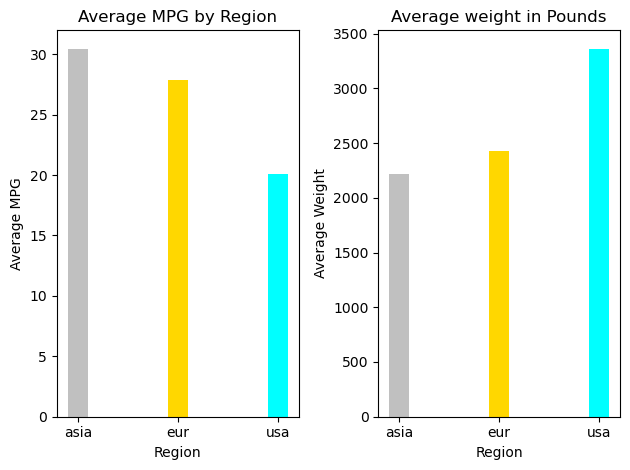

In [15]:
colors1 = [["silver"], ["gold"], ["aqua"]]
mean_list = [["asia", 30.450633, 4.101266, 2221.227848], ["eur", 27.891429, 4.157143, 2423.300000], ["usa", 20.083534, 6.248996, 3361.931727]]
mean_df = pd.DataFrame(mean_list, columns=['region', 'mpg', 'cyl', 'wt'])
fig = plt.figure(figsize=(8,4))
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar(mean_df.region[0], mean_df.mpg[0], color = colors1[0], width = 0.2)
ax1.bar(mean_df.region[1], mean_df.mpg[1], color = colors1[1], width = 0.2)
ax1.bar(mean_df.region[2], mean_df.mpg[2], color = colors1[2], width = 0.2)
ax1.set_title("Average MPG by Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Average MPG")

ax2.bar(mean_df.region[0], mean_df.wt[0], color = colors1[0], width = 0.2)
ax2.bar(mean_df.region[1], mean_df.wt[1], color = colors1[1], width = 0.2)
ax2.bar(mean_df.region[2], mean_df.wt[2], color = colors1[2], width = 0.2)
ax2.set_title("Average weight in Pounds")
ax2.set_xlabel("Region")
ax2.set_ylabel("Average Weight")

plt.tight_layout()
plt.show()

## Part 7: Relationship between Weight and Miles Per Gallon

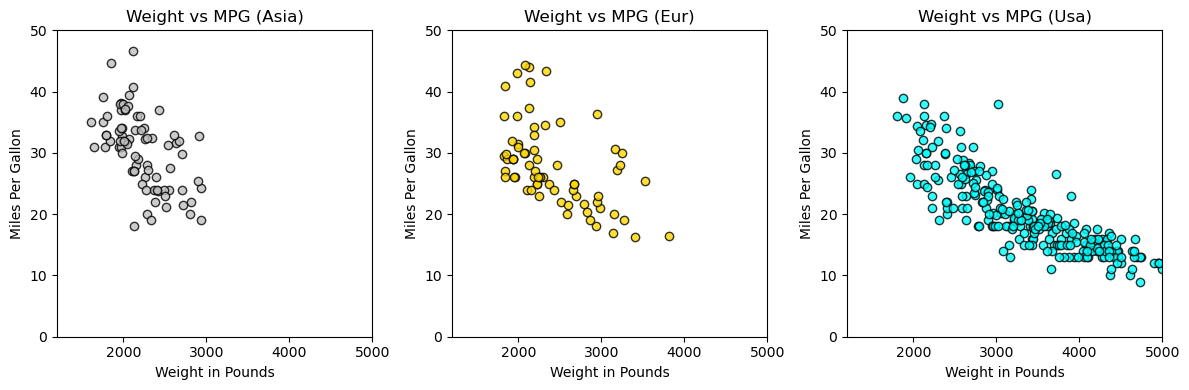

In [16]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])

for i, region in enumerate(regions):
    ax = axes[i]
    region_auto = auto[auto['region'] == region]
    ax.scatter(region_auto['wt'], region_auto['mpg'], color=colors1[i], edgecolor='black', alpha=0.8)
    ax.set_xlim([1200, 5000])
    ax.set_ylim([0, 50])
    ax.set_xlabel('Weight in Pounds')
    ax.set_ylabel('Miles Per Gallon')
    ax.set_title('Weight vs MPG ({})'.format(region.capitalize()))

plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region

In [17]:
cyl_values = np.unique(auto['cyl'])
print(cyl_values)

[3 4 5 6 8]


In [18]:
cyl_counts_by_region = pd.crosstab(auto['cyl'], auto['region'])
cyl_counts_by_region

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


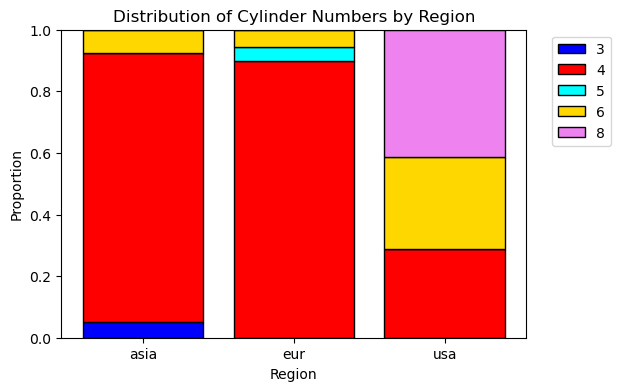

In [19]:
cyl_props_by_region = cyl_counts_by_region.div(cyl_counts_by_region.sum(axis=0), axis=1)
bar_bottoms = np.cumsum(cyl_props_by_region, axis=0) - cyl_props_by_region
colors2 = ['blue', 'red', 'aqua', 'gold', 'violet']
fig = plt.figure(figsize=[6,4])
for i in range(len(cyl_values)):
    plt.bar(cyl_props_by_region.columns, cyl_props_by_region.iloc[i, :], bottom=bar_bottoms.iloc[i, :], color=colors2[i], edgecolor='black', label=str(cyl_values[i]))
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Cylinder Numbers by Region')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()